# Разработка стратегии взаимодействия с клиентами на основе аналитических данных для сети фитнес-центров «Культурист-датасаентист»

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

## 1. Загрузка и подготовка данных к анализу

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\gym_churn.csv')

In [3]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Загрузка и ознакомление с данными прошли успешно.

Переходим к исследовательскому анализу данных

## 2. Исследовательский анализ данных

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
round(data.groupby(by = 'Churn').mean(), 2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


Сильные различия наблюдаются в факторах: Partner, Promo_friends, Contract_period, Group_visits, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month. 

Все эти признаки явно влияют на факт оттока клиентов.

Построим столбчатые гистограммы c распределением признаков для попавших и не попавших в отток

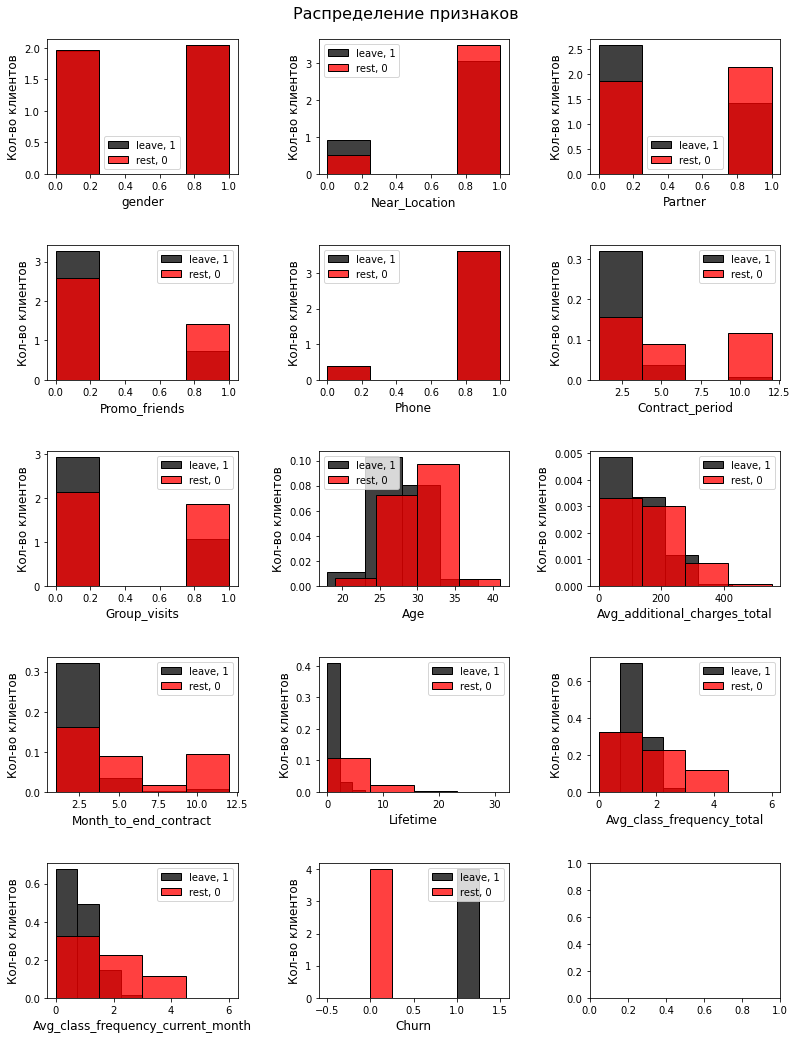

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,15))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение признаков', fontsize=16)
for value in data.columns:
    ax = axes_list.pop(0)
    sns.histplot(data.query('Churn == 1')[value].astype(int), bins=4, ax=ax, 
                 kde=False, color='black', label='leave, 1', stat="density", common_norm=False)
    sns.histplot(data.query('Churn == 0')[value].astype(int), bins=4, ax=ax, 
                 kde=False, color='red', label='rest, 0', stat="density", common_norm=False)
    ax.set_xlabel(value, fontsize=12)
    ax.set_ylabel('Кол-во клиентов', fontsize=12)
    ax.legend()

Также построим матрицу корреляций признаков.

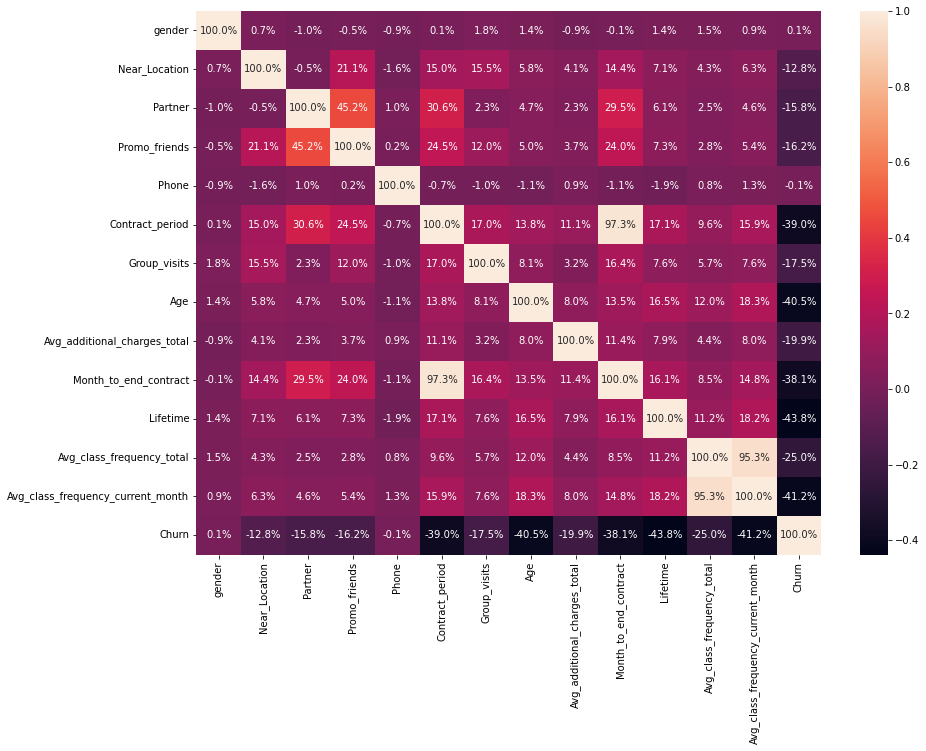

In [7]:
corr_matrix = data.loc[:,:].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1%');

#### Вывод
Заметно, что факт оттока имеет сильную отрицательную корреляцию с параметрами Contract_period, Age, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month. Следовательно, чем меньше значения этих параметром, тем выше шанс оттока клиента.

## 3. Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

Обучим модель на train-выборке логистической регрессией и случайным лесом.

In [8]:
y = data['Churn']
X = data.drop(['Churn'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

tree = RandomForestClassifier(random_state=0) 
tree.fit(X_train, y_train) 
y_pred_tree = tree.predict(X_test)

regression = LogisticRegression(random_state=0) 
regression.fit(X_train, y_train) 
y_pred_regression = regression.predict(X_test)

Оценим метрики accuracy, precision и recall для обеих моделей, чтобы посмотреть, какая модель показала себя лучше на основании данных метрик.

In [9]:
print('RandomForestClassifier:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_tree)))
print('Precision: {:.2f}'.format(precision_score (y_test, y_pred_tree)))
print('Recall: {:.2f}\n'.format(recall_score (y_test, y_pred_tree) ))
print('LogisticRegression:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_regression)))
print('Precision: {:.2f}'.format(precision_score (y_test, y_pred_regression)))
print('Recall: {:.2f}'.format(recall_score (y_test, y_pred_regression) ))

RandomForestClassifier:
Accuracy: 0.92
Precision: 0.84
Recall: 0.82

LogisticRegression:
Accuracy: 0.90
Precision: 0.81
Recall: 0.79


#### Вывод
Метрики accuracy, precision и recall у случайного леса немного лучше или равны метрикам логистической регрессии. 

На мой взгляд случайный лес справился немного лучше логистической регрессии.

## 4. Кластеризация клиентов

Стандартизируем данные. Построим матрицу расстояний и нарисуем дендрограмму. 

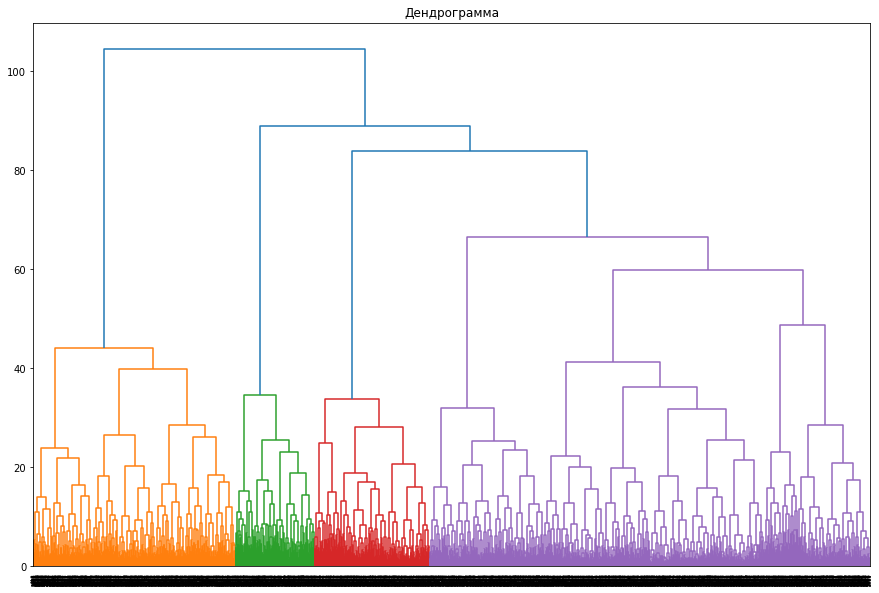

In [10]:
#дендрограмма долго рисуется, это нормально
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show() 

Исходя из дендрограммы оптимальное число кластеров — 4.

Обучим модель кластеризации и спрогнозируем кластеры клиентов. 

За количество кластеров возьмем 5 (как сказано в задании).

In [11]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)
data['cluster_km'] = labels

Изучим средние значения признаков для кластеров.

In [12]:
clusters = data.groupby(['cluster_km']).mean()
print(clusters)

              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.502970       0.959406  0.783168       0.574257  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.559666       0.976134  0.356802       0.230310  0.998807   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.889109      0.542574  29.982178   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.669451      0.473747  30.125298   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

Посмотрим на самый интересующий нас параметр - факт оттока клиента в текущем месяце. Самый маленький процент оттока у кластеров 0 и 4 - всего 3% и 7% соответственно.

Построим на распределение признаков для разных кластеров.

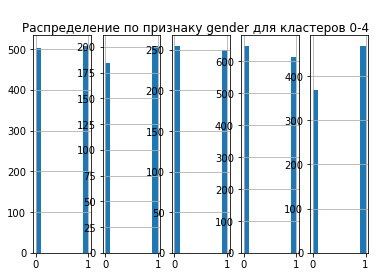

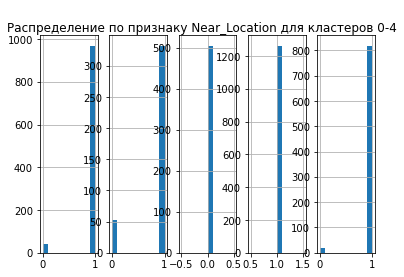

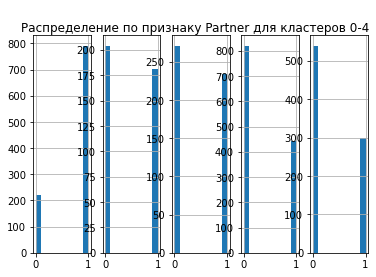

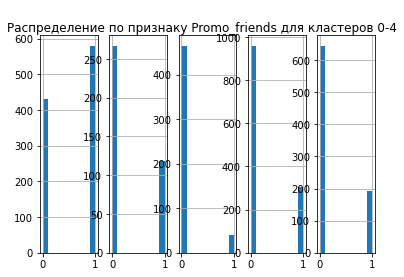

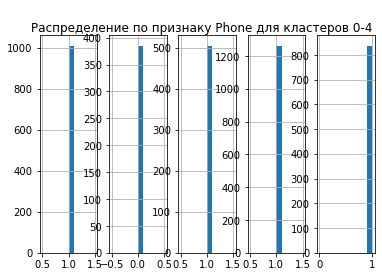

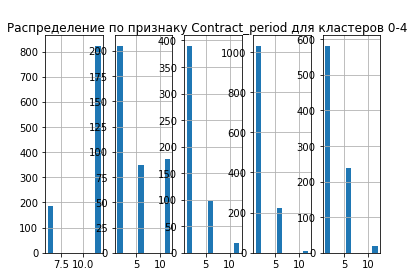

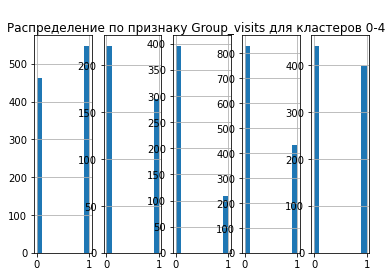

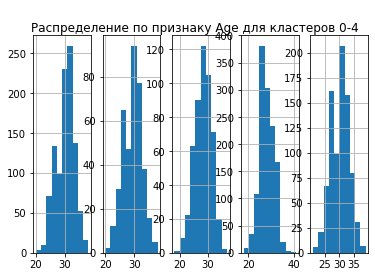

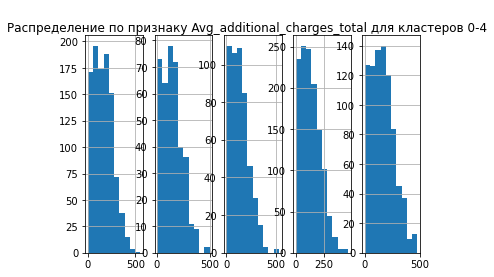

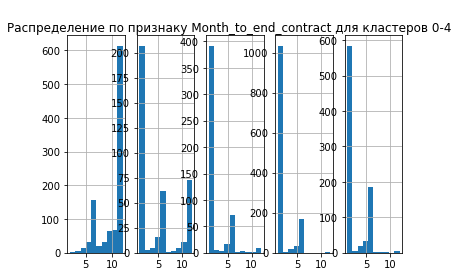

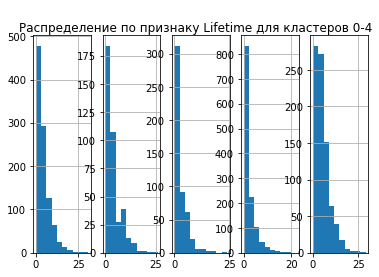

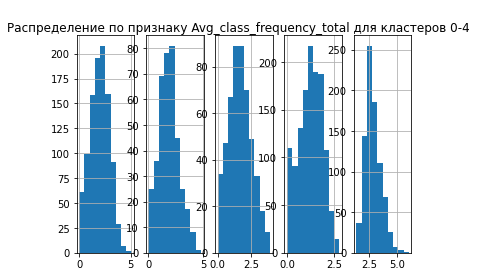

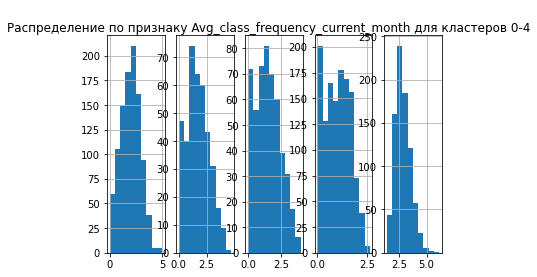

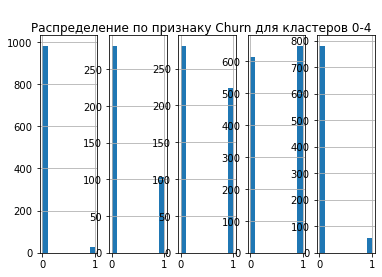

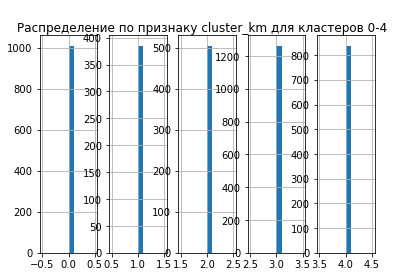

In [13]:
for col in data.columns:
    i = 1
    for value in [0, 1, 2, 3, 4]:
        plt.subplot(i, 5, value+1)
        data[data['cluster_km']==value][col].hist()
        plt.suptitle('\nРаспределение по признаку {} для кластеров 0-4'.format(col))  
    plt.show()
    i = i+1

Посчитаем долю оттока для каждого полученного кластера.

In [14]:
print(round(data.groupby(by = 'cluster_km')['Churn'].mean()*100,1))

cluster_km
0     2.8
1    26.8
2    44.4
3    51.4
4     6.8
Name: Churn, dtype: float64


#### Вывод
Кластеры сильно отличаются по доле оттока. Например в 3 кластере уходит половина клиентов, а в 0 всего 3%.

Самыми надеждными кластерами по доле оттока являются 0 и 4 кластеры.

## 5. Общие выводы и базовые рекомендации по работе с клиентами

В первую очередь стоит сосредоточиться на привлечении клиентов, подходящих под описание кластеров с наименьшей доля оттока.
Также стоит учитывать, какие факторы больше всего влияют на уход клиентов, а какие наоборот, помогают их удержать.

Отличительные черты клиентов с минимальной склонностью к оттоку: 
- Высокая длительность текущего действующего абонемента;
- Прошло много времени с момента первого обращения в фитнес-центр;
- Чаще других посещают групповые занятия;
- Хорошо покупают дополнительные услуги фитнес-центра;
- Посещают фитнес-центр в среднем 2 раза в неделю;

Отличительны черты клиентов, в большей степени склонных к оттоку:
- Маленькая длительность текущего действующего абонемента;
- Прошло мало времени с момента первого обращения в фитнес-центр;
- Реже других посещают групповые занятия;
- Осталось мало времени до окончания срока текущего действующего абонемента;
- Неохотно покупают дополнительные услуги фитнес-центра;